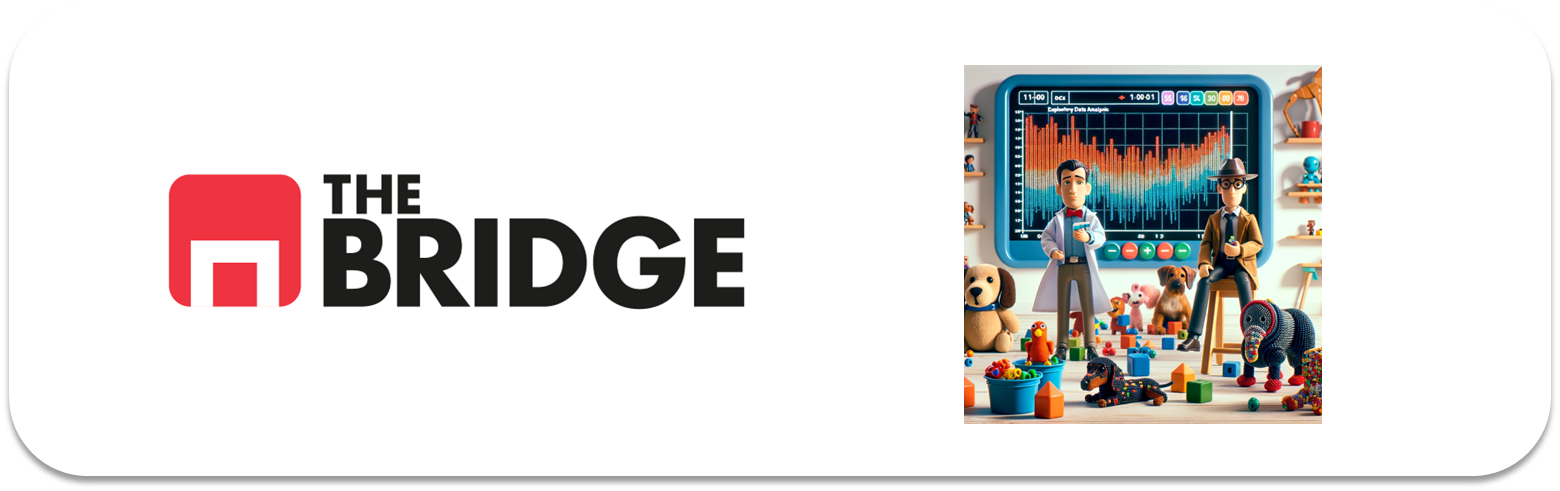

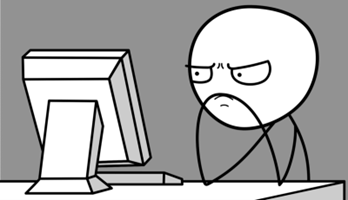

Para ejercitarte y afianzar lo aprendido sobre el análisis bivariante, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from bootcampviztools import *

In [7]:
def cardinalidad(df_in, umbral_categoria, umbral_continua):
    # Crear una lista para almacenar los resultados
    resultados = []
    
    # Iterar sobre las columnas del dataframe
    for columna in df_in.columns:
        # Calcular la cardinalidad absoluta
        cardinalidad_absoluta = df_in[columna].nunique()
        # Calcular la cardinalidad como porcentaje
        cardinalidad_porcentaje = cardinalidad_absoluta / len(df_in) * 100
        
        # Determinar la clasificación
        if cardinalidad_absoluta == 2:
            clasificacion = "Binaria"
        elif cardinalidad_absoluta < umbral_categoria:
            clasificacion = "Categórica"
        elif cardinalidad_porcentaje >= umbral_continua:
            clasificacion = "Numérica Continua"
        else:
            clasificacion = "Numérica Discreta"
        
        # Añadir los resultados para esta columna
        resultados.append({
            "Columna": columna,
            "Cardinalidad": cardinalidad_absoluta,
            "Cardinalidad (%)": cardinalidad_porcentaje,
            "Clasificación": clasificacion
        })
    
    # Convertir la lista de resultados en un DataFrame
    df_resultado = pd.DataFrame(resultados)
    return df_resultado

### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [6]:
df_adm = pd.read_csv("./data/admission_data.csv")
df_adm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12763 entries, 0 to 12762
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12763 non-null  int64 
 1   Year        12763 non-null  int64 
 2   Major       12763 non-null  object
 3   Gender      12763 non-null  object
 4   Admission   12763 non-null  object
dtypes: int64(2), object(3)
memory usage: 498.7+ KB


In [ ]:
cardinalidad(df_adm, 10, 30)

,Columna,Cardinalidad,Cardinalidad (%),Clasificación
0,Unnamed: 0,12763,100.000000,Numérica Continua
1,Year,1,0.007835,Categórica
2,Major,7,0.054846,Categórica
3,Gender,2,0.015670,Binaria
4,Admission,2,0.015670,Binaria


### Ejercicio 2

Haz el análisis bivariante de "Admission" y "Major" (emplea las funciones del workout importándolas del módulo `bootcampviztools`, o utiliza las visualizaciones del notebook en el repositorio) y contesta a las siguientes preguntas:
* ¿Cuál es el departamento con el mayor porcentaje de admsiones?¿Y el de menor?
* ¿Existe alguna diferencia destacada entre los departamentos?

- El departamento con mayor porcentaje de admisiones es Department of Physics and Astronomy y el de menos School of Political Science and International Relations.
- Si, el Department of Psychology tiene una relacion anormal entre la cantidad de admitidos y rechazados

In [12]:
df_adm.Major.value_counts(normalize=True)*100


Major
Other                                                      62.085717
Department of Physics and Astronomy                         9.762595
School of Medicine                                          7.192666
Department of Mechanical Engineering                        6.205438
Department of Psychology                                    5.594296
Department of Economics                                     4.583562
School of Political Science and International Relations     4.575727
Name: proportion, dtype: float64

In [13]:
df_adm.Admission.value_counts(normalize=True)*100

Admission
Rejected    59.006503
Accepted    40.993497
Name: proportion, dtype: float64

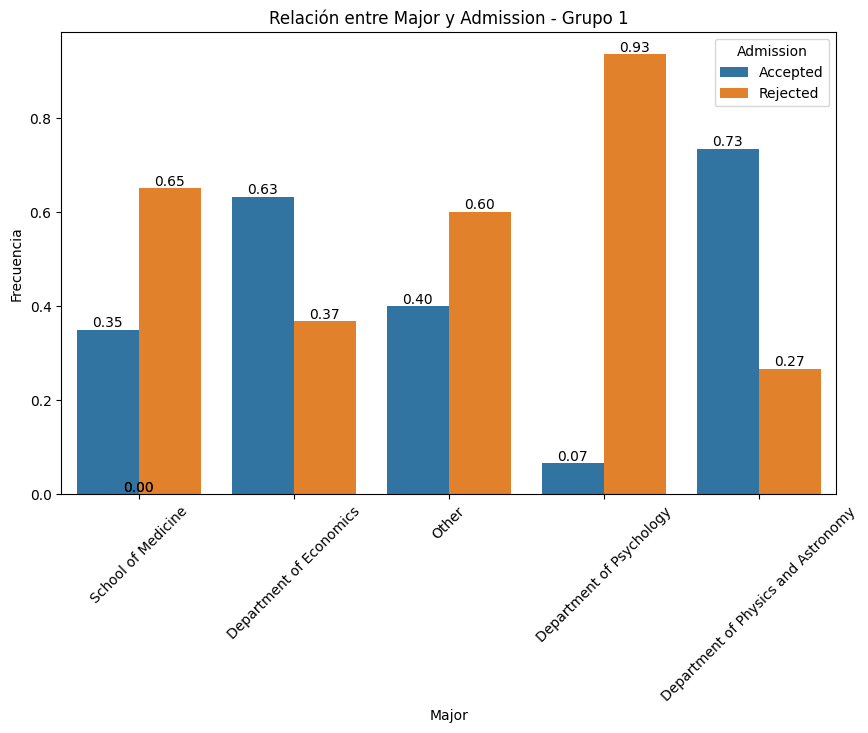

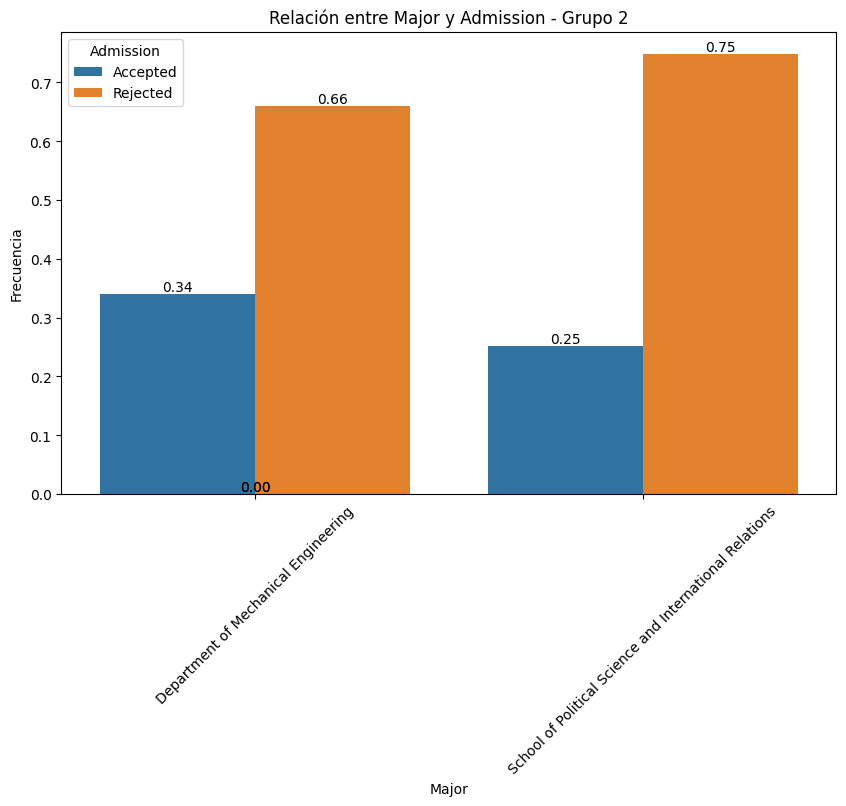

In [15]:
plot_categorical_relationship_fin(df_adm, "Major","Admission", show_values= True, relative_freq = True)

In [22]:
df_adm.groupby("Major", as_index = False)["Admission"].value_counts(normalize=True)

,Major,Admission,proportion
0,Department of Economics,Accepted,0.632479
1,Department of Economics,Rejected,0.367521
2,Department of Mechanical Engineering,Rejected,0.660354
3,Department of Mechanical Engineering,Accepted,0.339646
4,Department of Physics and Astronomy,Accepted,0.733547
5,Department of Physics and Astronomy,Rejected,0.266453
6,Department of Psychology,Rejected,0.934174
7,Department of Psychology,Accepted,0.065826
8,Other,Rejected,0.600707
9,Other,Accepted,0.399293


### Ejercicio 3

Repite el análisis para "Admission" y "Gender" y responde a las siguientes preguntas:
* ¿Existe una diferencia visual significativa entre el porcentaje de admitidos de cada género?
* ¿Cuál de los dos grupos tiene más admisiones?

- Si, El genero masculino tiene un 33% mas de admitidos que el femenino
- El masculino tiene mas admisiones

In [23]:
df_adm.Gender.value_counts(normalize=True)*100


Gender
M    66.144323
F    33.855677
Name: proportion, dtype: float64

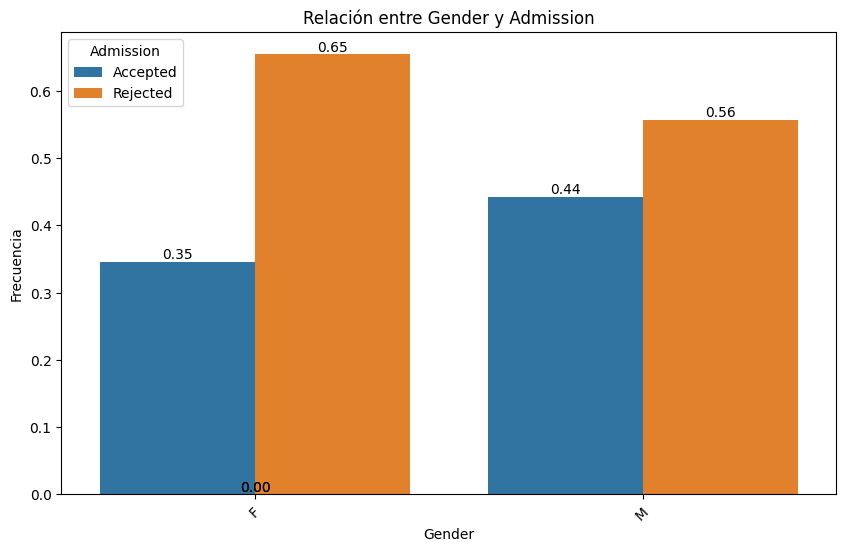

In [24]:
plot_categorical_relationship_fin(df_adm, "Gender","Admission", show_values= True, relative_freq = True)

### Ejercicio 4

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [ ]:
df_tips = pd.read_csv("./data/tips.csv")
df_tips.groupby("sex")["tip"].describe().T


sex,Female,Male
count,87.000000,157.000000
mean,2.833448,3.089618
std,1.159495,1.489102
min,1.000000,1.000000
25%,2.000000,2.000000
50%,2.750000,3.000000
75%,3.500000,3.760000
max,6.500000,10.000000


In [48]:
df_tips.groupby("sex")["tip"].apply("median")

sex
Female    2.75
Male      3.00
Name: tip, dtype: float64

In [49]:
df_tips.groupby("sex")["tip"].apply("mean")

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

### Ejercicio 5

Haz el análisis bivariante de "tip" y "sex" (emplea las funciones del workout importándolas del módulo `bootcampviztools`, o utiliza las visualizaciones del notebook en el repositorio), añade el cálculo de la media y mediana de la variable continua por cada valor de la variable categórica, y contesta a las siguientes preguntas:
* ¿Existe alguna diferencia visualmente significativa entre las propinas de los grupos de la variable "sex"?
* ¿Son diferentes respecto al  conjunto total?

- El genero masculino tiene un aumento significativo en la frecuencia de aparicion de tips entre 2 y 3
- No

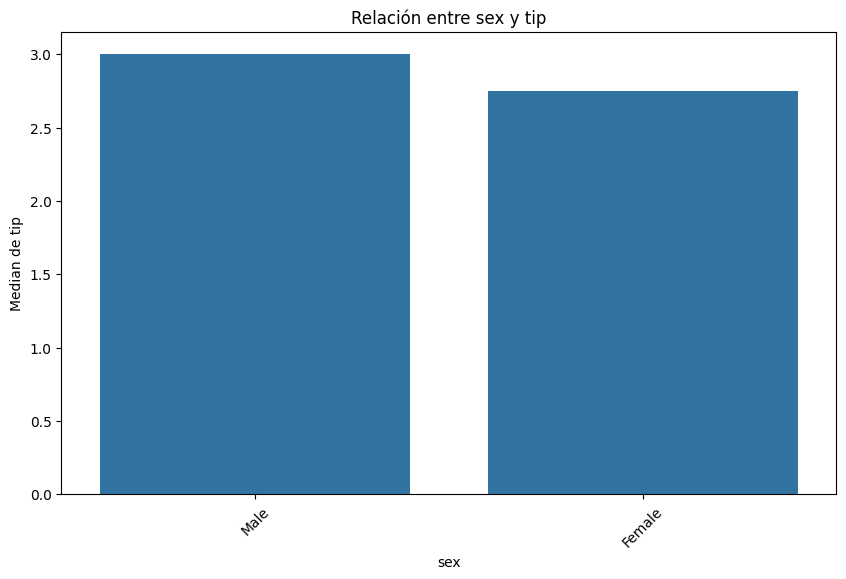

In [32]:
plot_categorical_numerical_relationship(df_tips, "sex","tip",measure="median")

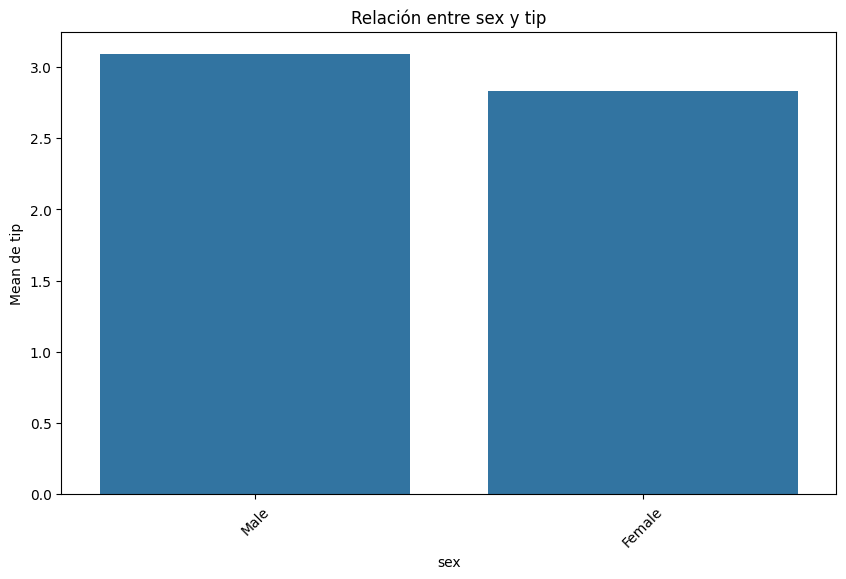

In [33]:
plot_categorical_numerical_relationship(df_tips, "sex","tip",measure="mean")

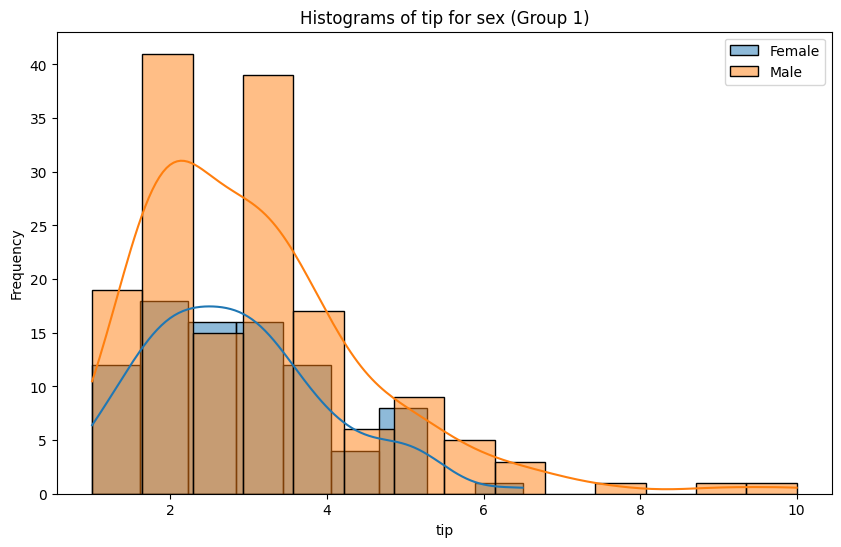

In [37]:
plot_grouped_histograms(df_tips,"sex","tip", 2)

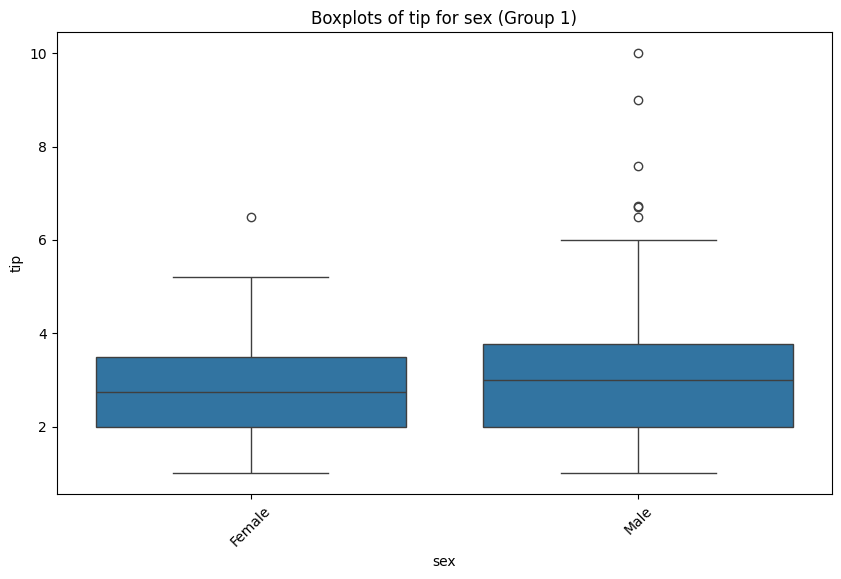

In [35]:
plot_grouped_boxplots(df_tips,"sex","tip")

### Ejercicio 6

Repite el análisis pero esta vez para "tip" y "smoker", añade también el cálculo de la media y de la mediana de la variable continua por cada valor de la variable categórica, y contesta a las siguiente pregunta:
* ¿Existe alguna diferencia visualmente significativa entre las propinas de los grupos de la variable "smoker"?

In [50]:
df_tips.groupby("smoker")["tip"].describe().T

smoker,No,Yes
count,151.000000,93.000000
mean,2.991854,3.008710
std,1.377190,1.401468
min,1.000000,1.000000
25%,2.000000,2.000000
50%,2.740000,3.000000
75%,3.505000,3.680000
max,9.000000,10.000000


In [51]:
df_tips.groupby("smoker")["tip"].apply("median")

smoker
No     2.74
Yes    3.00
Name: tip, dtype: float64

In [53]:
df_tips.groupby("smoker")["tip"].apply("mean")

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64

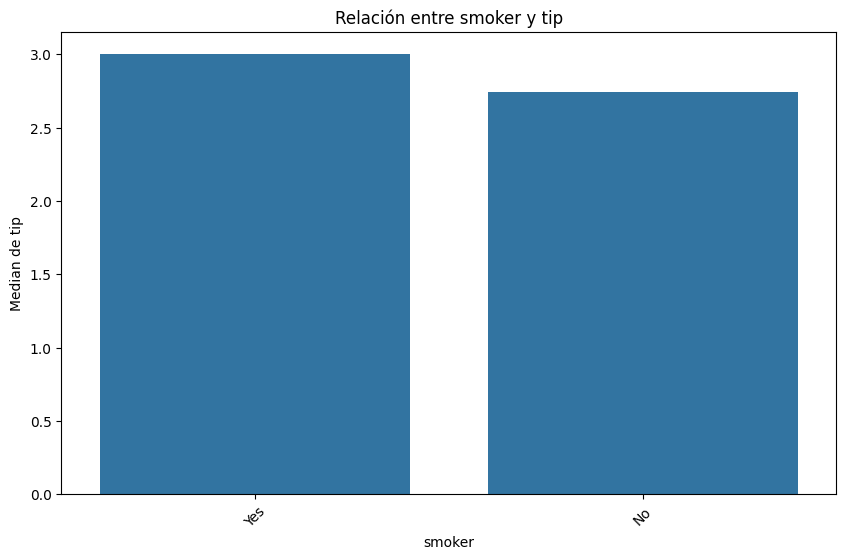

In [54]:
plot_categorical_numerical_relationship(df_tips, "smoker","tip",measure="median")

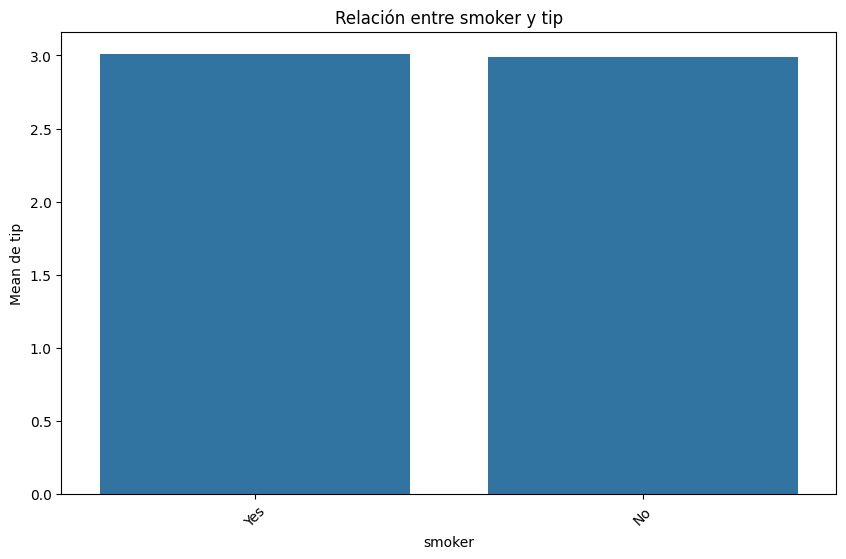

In [55]:
plot_categorical_numerical_relationship(df_tips, "smoker","tip",measure="mean")

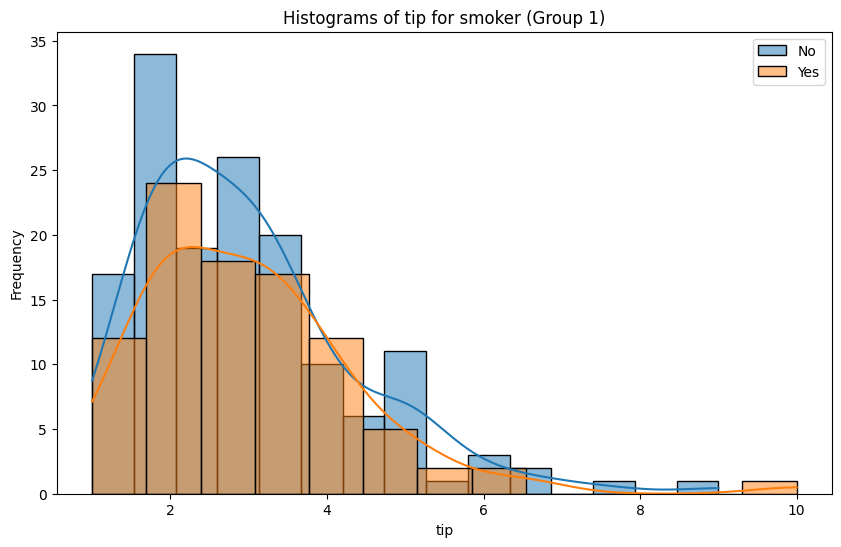

In [56]:
plot_grouped_histograms(df_tips,"smoker","tip", 2)

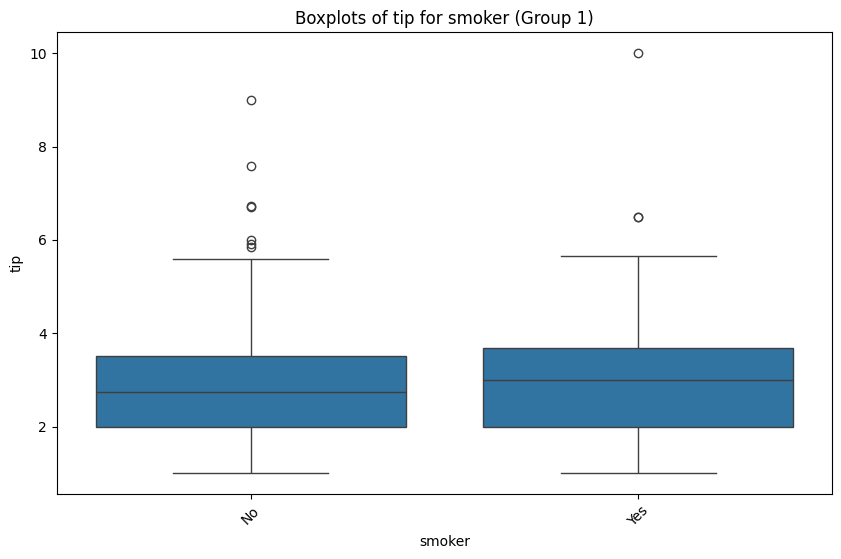

In [57]:
plot_grouped_boxplots(df_tips,"smoker","tip")

### Ejericicio 7

Carga ahora el datase de accidentes de coches, que se encuentra en la ruta "./data/car_crashes.csv" y deshazte de las columnas innecesarias

In [58]:
df_cars = pd.read_csv("./data/car_crashes.csv", sep="|")
df_cars.head(5)

,Unnamed: 0,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### Ejercicio 8

Haz un analisis bivairante entre "total" y "speeding". Muestra su diagrama de dispersión y su valor de correlación de pearson obtenido con pandas. Luego contesta a la siguiente pregunta
* ¿Existe alguna relación visual entre las variables?¿Y numérica?

- Si, al tener un coeficiente positivo de 0.64 quiere decir que ambas variables estan correlacionadas entre si, se podria inferir que, hay una relacion entre el exceso de velocidad con la cantidad de accidentes de coche totales

In [59]:
df_cars[["total","speeding"]].corr()

,total,speeding
total,1.000000,0.611548
speeding,0.611548,1.000000


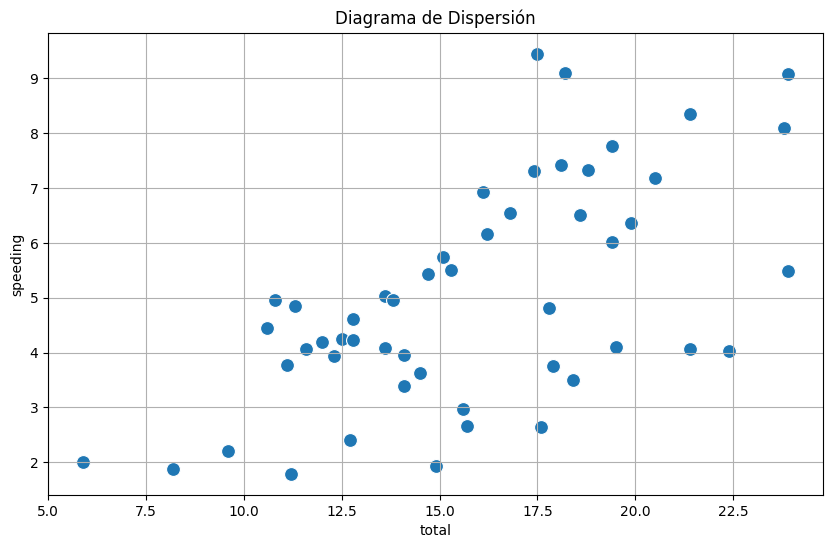

In [85]:
grafico_dispersion_con_correlacion(df_cars,"total","speeding", 100)

### Ejercicio 9

Usa scipy tal como lo hicimos en el workout para hacer el test de correlación. ¿Cuál es el p-value?¿Qué podemos decir de la correlación lineal entre "total" y "speeding"?

- El p-value tiene un valor de 1.87e-06 (esta muy por debajo de 0.05) y un Coeficiente de correlación de 0.61 (cercano a 1), por lo que podemos deducir que hay una alta relacion positiva entre ambas variables

In [77]:
from scipy.stats import pearsonr

# Calcular correlación y p-value
correlation, p_value = pearsonr(df_cars["total"], df_cars["speeding"])

print(f"Coeficiente de correlación: {round(correlation,2)}")
print(f"P-value: {round(p_value,8)}")

Coeficiente de correlación: 0.61
P-value: 1.87e-06
